# DIFFERENT STRATEGIES

### A list of the signals:
- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Absolute Price Oscillator (APO)
- Moving Average Convergence Divergence (MACD)
- Bollinger Bands (BBANDS)
- Relative Strength Indicator (RSI)
- Standard Deviation (STDEV)
- Momentum (MOM)

In [1]:
''' import libraries '''
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math

## raw data got from yahoo for google stock

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data.pkl'
try:
    goog_data = pd.read_pickle(SRC_DATA_FILENAME)
    print('File data found...reading GOOG data')
except FileNotFoundError:
    print('File not found...downloading the GOOG data')
    goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data.to_pickle(SRC_DATA_FILENAME)
    goog_data_signal = pd.DataFrame(index=goog_data.index)
    goog_data_signal['price'] = goog_data['Adj Close']
    
# goog_data
#  in this i am saving the data for google stock in a csv file becuase I will have to use the raw data
#  for every day calculations so its better to save it on the pc

File data found...reading GOOG data


# SMA - Simple Moving Average

In [3]:
time_period = 20 # number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values

close = goog_data['Close']

for close_price in goog_data['Close']:
    history.append(close_price)
    if len(history) > time_period: 
        # we remove oldest price because we only average over last 'time_period' prices
        del (history[0])
    sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

In [4]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage
Date,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259


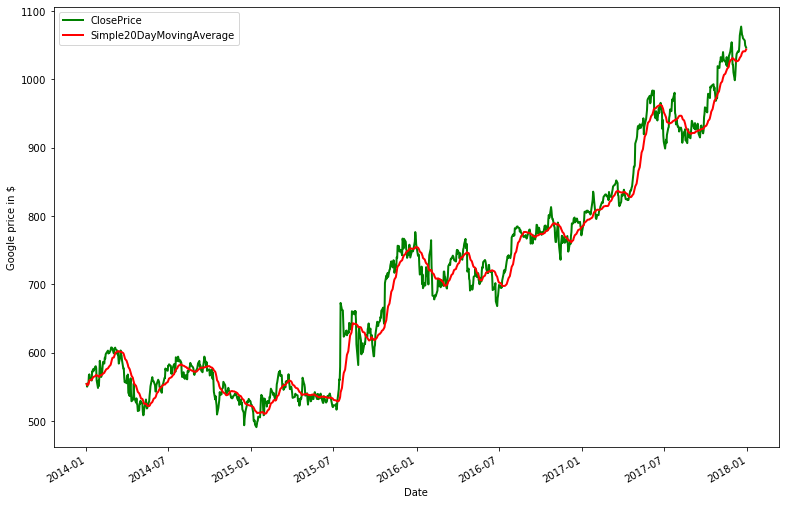

In [5]:
fig = plt.figure(figsize = (13, 9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.savefig('sma.png')
plt.show()

This is a simple moving Average calculator and it is used to determin the strength of the momentum in various ways. For further information I have used this link https://www.investopedia.com/terms/s/sma.asp

# EMA - Exponential Moving Average 

In [6]:
num_periods = 20 # number of days over which to average
K = 2 / (num_periods + 1) # smoothing constant
ema_p = 0
ema_values = [] # to hold computed EMA values

for close_price in close:
    if (ema_p == 0):
        # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)
        
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']
ema

Date
2014-01-02     554.481689
2014-01-03     554.096465
2014-01-06     554.332406
2014-01-07     555.567757
2014-01-08     556.797894
                 ...     
2017-12-22    1046.004932
2017-12-26    1047.027319
2017-12-27    1047.250431
2017-12-28    1047.335153
2017-12-29    1047.246093
Name: Exponential20DayMovingAverage, Length: 1007, dtype: float64

In [7]:
goog_data.head(10) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage
Date,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,556.573853,553.830790,554.332406
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,567.303589,557.198990,555.567757
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192,568.484192,559.456030,556.797894
2014-01-09,569.973572,560.678467,569.585083,563.009705,4184626.0,563.009705,563.009705,560.048309,557.389495
2014-01-10,567.413208,559.029602,567.413208,562.979797,4303069.0,562.979797,562.979797,560.467093,557.921905
2014-01-13,571.313599,556.499084,561.131714,559.393250,4855933.0,559.393250,559.393250,560.332863,558.062033
2014-01-14,573.350952,561.938721,566.850281,572.553955,4983811.0,572.553955,572.553955,561.690762,559.442216


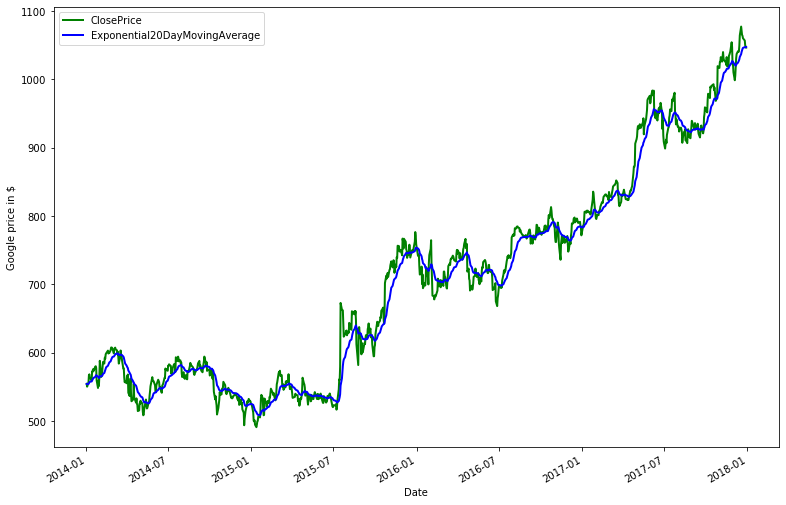

In [8]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.savefig('ema.png')
plt.show()

This is the difference between Fast_EMA and a Slow_EMA

# APO - Absolute Price Oscillator

In [9]:
K_fast = 2 /11 # smoothing factor for fast EMA, num_periods_fast = 10 # time period for the fast EMA
ema_fast = 0

K_slow = 2 /41 # smoothing factor for slow EMA, num_periods_slow = 40 # time period for slow EMA, 40+1
ema_slow = 0

ema_fast_values = [] 
ema_slow_values = []
apo_values = [] 

for close_price in close:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

In [10]:
# goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbsolutePriceOscillator=pd.Series(apo_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
apo = goog_data['AbsolutePriceOscillator']
# goog_data
apo

Date
2014-01-02     0.000000
2014-01-03    -0.538119
2014-01-06    -0.135693
2014-01-07     1.606166
2014-01-08     3.104623
                ...    
2017-12-22    26.505894
2017-12-26    25.265238
2017-12-27    23.095104
2017-12-28    21.037683
2017-12-29    19.018382
Name: AbsolutePriceOscillator, Length: 1007, dtype: float64

In [11]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,SlowExponential40DayMovingAverage,AbsolutePriceOscillator
Date,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,554.481689,0.000000
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,554.284379,-0.538119


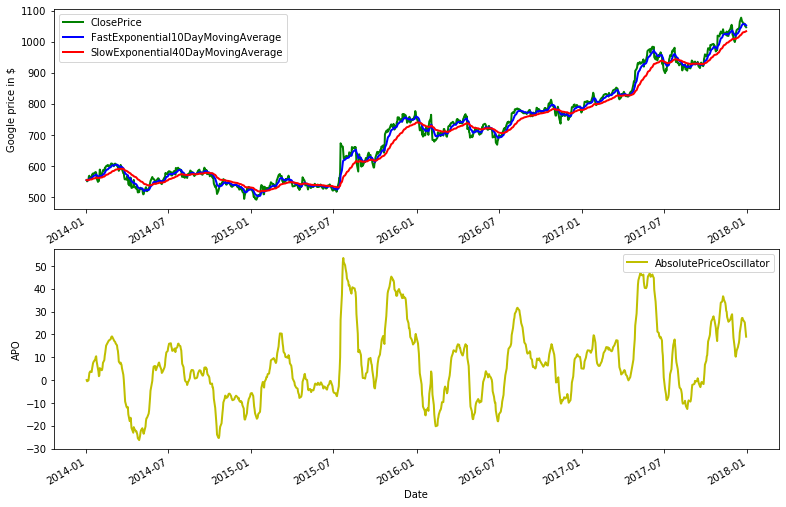

In [12]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='y', lw=2., legend=True)
plt.show()

 ### - note -
 formula: APO = Fast Exponential Moving Average - Slow Exponential Moving Average

# MACD - Moving Average Convergence Divergence

In [13]:
num_periods_fast = 10 # fast EMA time period
K_fast = 2 / (num_periods_fast + 1) # fast EMA smoothing factor
ema_fast = 0
num_periods_slow = 40 # slow EMA time period
K_slow = 2 / (num_periods_slow + 1) # slow EMA smoothing factor
ema_slow = 0
num_periods_macd = 20 # MACD EMA time period
K_macd = 2 / (num_periods_macd + 1) # MACD EMA smoothing factor
ema_macd = 0
ema_fast_values = [] # track fast EMA values for visualization purposes
ema_slow_values = [] # track slow EMA values for visualization purposes
macd_values = [] # track MACD values for visualization purposes
macd_signal_values = [] # MACD EMA values tracker
macd_histogram_values = [] # MACD - MACD-EMA
for close_price in close:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    macd = ema_fast - ema_slow # MACD is fast_MA - slow_EMA
    if ema_macd == 0:
        ema_macd = macd
    else:
        ema_macd = (macd - ema_macd) * K_slow + ema_macd # signal is EMA of MACD values

    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    macd_histogram_values.append(macd - ema_macd)
# macd_histogram_values

In [14]:
# goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=goog_data.index))
goog_data = goog_data.assign(MACDHistorgram=pd.Series(macd_histogram_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
macd = goog_data['MovingAverageConvergenceDivergence']
ema_macd = goog_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = goog_data['MACDHistorgram']
macd_histogram

Date
2014-01-02    0.000000
2014-01-03    0.000000
2014-01-06    0.382796
2014-01-07    2.021013
2014-01-08    3.347789
                ...   
2017-12-22    4.818671
2017-12-26    3.403478
2017-12-27    1.173180
2017-12-28   -0.841107
2017-12-29   -2.720876
Name: MACDHistorgram, Length: 1007, dtype: float64

In [15]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,SlowExponential40DayMovingAverage,AbsolutePriceOscillator,MovingAverageConvergenceDivergence,Exponential20DayMovingAverageOfMACD,MACDHistorgram
Date,,,,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,554.481689,0.000000,0.000000,0.000000,0.0
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,554.284379,-0.538119,-0.538119,-0.538119,0.0


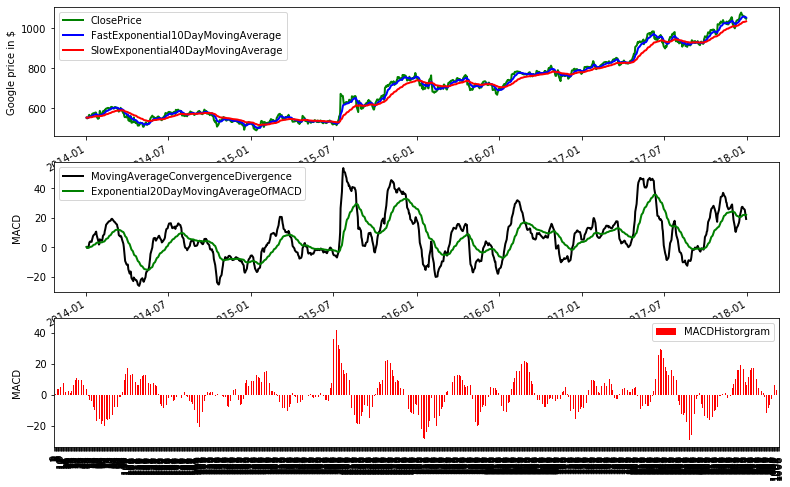

In [16]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)
plt.show()

### - note -
 formula: MACD = FastMA - SlowMA;
 
 #### useful link - 
 https://www.investopedia.com/terms/m/macd.asp
 (MACD=12-Period EMA − 26-Period EMA)

# BBANDS - Bollinger bands

In [17]:
time_period = 20 # history length for Simple Moving Average for middle band
stdev_factor = 2 # Standard Deviation Scaling factor for the upper andlower bands
history = [] # price history for computing simple moving average
sma_values = [] # moving average of prices for visualization purposes
upper_band = [] # upper band values
lower_band = [] # lower band values
for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # we only want to maintain at most 'time_period' number of price observations
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma) # simple moving average or middle band
    variance = 0 # variance is the square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
        
    stdev = math.sqrt(variance / len(history)) # use square root to get standard deviation
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)


In [18]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=goog_data.index))
goog_data = goog_data.assign(UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=goog_data.index))
goog_data = goog_data.assign(LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=goog_data.index))
close_price = goog_data['ClosePrice']
mband = goog_data['MiddleBollingerBand20DaySMA']
uband = goog_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = goog_data['LowerBollingerBand20DaySMA2StdevFactor']

In [19]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,SlowExponential40DayMovingAverage,AbsolutePriceOscillator,MovingAverageConvergenceDivergence,Exponential20DayMovingAverageOfMACD,MACDHistorgram,MiddleBollingerBand20DaySMA,UpperBollingerBand20DaySMA2StdevFactor,LowerBollingerBand20DaySMA2StdevFactor
Date,,,,,,,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,554.481689,0.000000,0.000000,0.000000,0.0,554.481689,554.481689,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,554.284379,-0.538119,-0.538119,-0.538119,0.0,552.459259,556.504120,548.414398


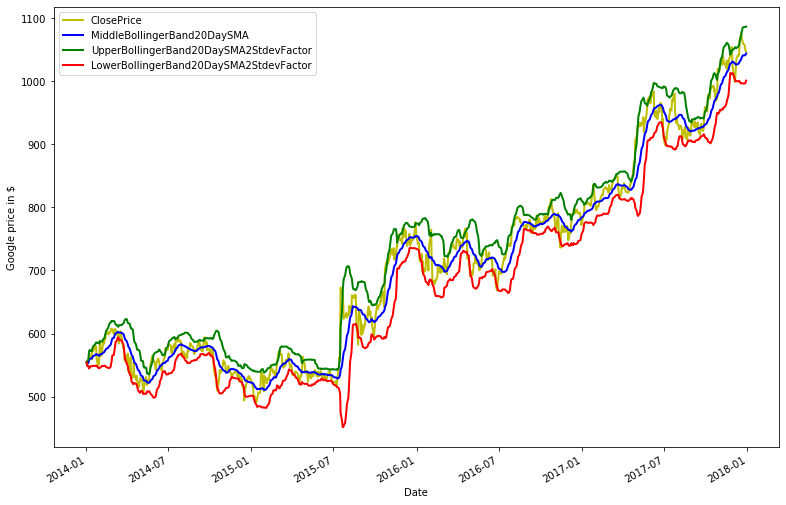

In [20]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='y', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='g', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

### - note -
formula: 

Middle Band = n-period moving average

Upper Band = Middle Band + ( y * n-period standard deviation)

Lower Band = Middle Band - ( y * n-period standard deviation)

Where:

n = number of periods;
y = factor to apply to the standard deviation value, (typical default for y = 2)
 
 #### useful link - 
 https://www.investopedia.com/terms/b/bollingerbands.asp

The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but can be modified.

# RSI - Relative strength indicator

In [21]:
time_period = 20 # look back period to compute gains & losses
gain_history = [] # history of gains over look back period (0 if no gain,magnitude of gain if gain)
loss_history = [] # history of losses over look back period (0 if no loss,magnitude of loss if loss)

avg_gain_values = [] # track avg gains for visualization purposes
avg_loss_values = [] # track avg losses for visualization purposes
rsi_values = [] # track computed RSI values

last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

for close_price in close:
    if last_price == 0:
        last_price = close_price
    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
    last_price = close_price
    if len(gain_history) > time_period: # maximum observations is equal to lookback period
        del (gain_history[0])
        del (loss_history[0])
        
    avg_gain = stats.mean(gain_history) # average gain over lookback period
    avg_loss = stats.mean(loss_history) # average loss over lookback period
    avg_gain_values.append(avg_gain)
    avg_loss_values.append(avg_loss)
    rs = 0
    if avg_loss > 0: # to avoid division by 0, which is undefined
        rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)
# rsi_values

In [22]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
rs_gain = goog_data['RelativeStrengthAvgGainOver20Days']
rs_loss = goog_data['RelativeStrengthAvgLossOver20Days']
rsi = goog_data['RelativeStrengthIndicatorOver20Days']

In [23]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,...,AbsolutePriceOscillator,MovingAverageConvergenceDivergence,Exponential20DayMovingAverageOfMACD,MACDHistorgram,MiddleBollingerBand20DaySMA,UpperBollingerBand20DaySMA2StdevFactor,LowerBollingerBand20DaySMA2StdevFactor,RelativeStrengthAvgGainOver20Days,RelativeStrengthAvgLossOver20Days,RelativeStrengthIndicatorOver20Days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,...,0.000000,0.000000,0.000000,0.0,554.481689,554.481689,554.481689,0.0,0.00000,0.0
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,...,-0.538119,-0.538119,-0.538119,0.0,552.459259,556.504120,548.414398,0.0,2.02243,0.0


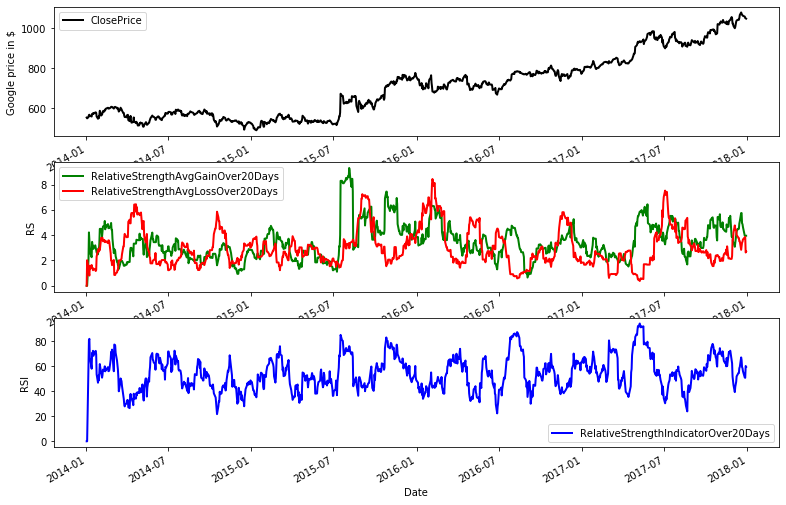

In [24]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=2., legend=True)
plt.show()

### - note -
formula: 

RSI = 100 - (100 / (1 + RS))

RS = avg_gain / avg_loss
 #### useful link - 
https://www.investopedia.com/terms/r/rsi.asp

# STDEV - Standard deviation

In [25]:
time_period = 20 # look back period
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] # history of computed stdev values
for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # we track at most 'time_period' number of prices
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma)
    variance = 0 # variance is square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)

In [26]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']

In [27]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,...,MovingAverageConvergenceDivergence,Exponential20DayMovingAverageOfMACD,MACDHistorgram,MiddleBollingerBand20DaySMA,UpperBollingerBand20DaySMA2StdevFactor,LowerBollingerBand20DaySMA2StdevFactor,RelativeStrengthAvgGainOver20Days,RelativeStrengthAvgLossOver20Days,RelativeStrengthIndicatorOver20Days,StandardDeviationOver20Days
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,...,0.000000,0.000000,0.0,554.481689,554.481689,554.481689,0.0,0.00000,0.0,0.00000
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,...,-0.538119,-0.538119,0.0,552.459259,556.504120,548.414398,0.0,2.02243,0.0,2.02243


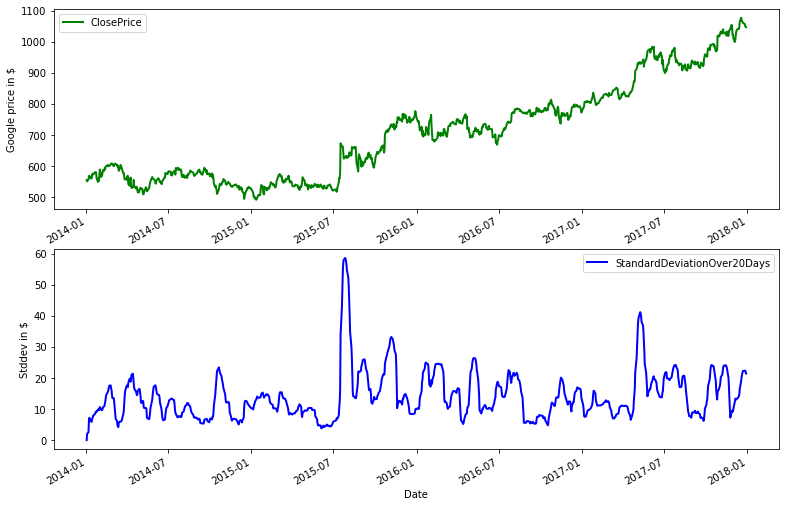

In [28]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()

### - note -
formula: 

variance = sum(((hist_price - sma) ^ 2))   -    the sum of all difference's square (between raw data and mean value)

stdev = math.sqrt(variance / len(history))   -   len(history): total length of dataset

 #### useful link - 
 https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/standard-deviation-stddev/

#  MOM - Momentum

In [29]:
time_period = 20 # how far to look back to find reference price to compute momentum
history = [] # history of observed prices to use in momentum calculation
mom_values = [] # track momentum values for visualization purposes
for close_price in close:
    history.append(close_price)
    if len(history) > time_period: # history is at most 'time_period' number of observations
        del (history[0])
    mom = close_price - history[0]  # Price - Price of n periods ago
    mom_values.append(mom)

In [30]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']

In [31]:
goog_data.head(2) # test for current goog_data

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage,Exponential20DayMovingAverage,FastExponential10DayMovingAverage,...,Exponential20DayMovingAverageOfMACD,MACDHistorgram,MiddleBollingerBand20DaySMA,UpperBollingerBand20DaySMA2StdevFactor,LowerBollingerBand20DaySMA2StdevFactor,RelativeStrengthAvgGainOver20Days,RelativeStrengthAvgLossOver20Days,RelativeStrengthIndicatorOver20Days,StandardDeviationOver20Days,MomentumFromPrice20DaysAgo
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,554.481689,554.481689,554.481689,554.481689,...,0.000000,0.0,554.481689,554.481689,554.481689,0.0,0.00000,0.0,0.00000,0.000000
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,550.436829,552.459259,554.096465,553.746260,...,-0.538119,0.0,552.459259,556.504120,548.414398,0.0,2.02243,0.0,2.02243,-4.044861


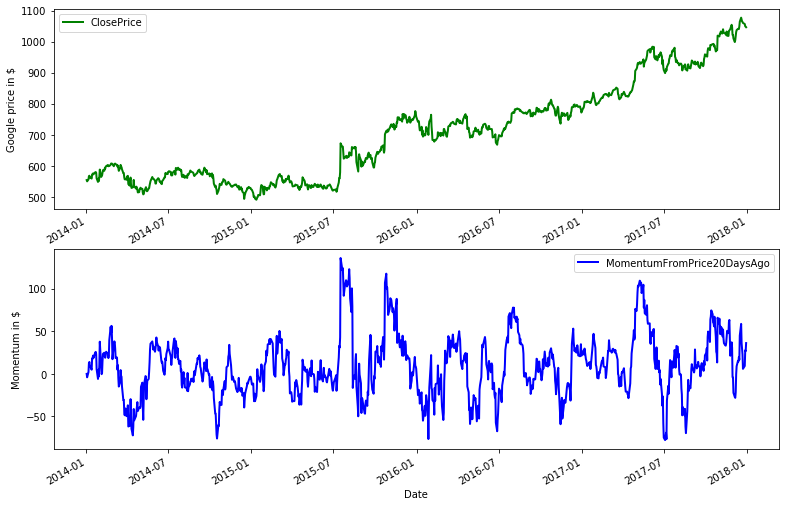

In [32]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()

### - note -
formula: 

MOM =  Price - Price of n periods ago
 
 #### useful link - 
https://www.investopedia.com/terms/m/momentum.asp

the difference bwteen the current price and price of some fixed time periods in the past

# Analysis

Conclusion: Here you can see as per the observation how the raw data is processed to calculate SMA and the EMA to provide a more realistic price moving average. Then the data is used foe further procession and we calculate a fast and slow EMA or we can say a high and slow reactive average price momentum and then we used it to calculate the APO.

APO is positive when in short term the avg price is breaking towards the upside which we can say that it is over bought in short term and then it is negative when it is deviating towards the downside and we can say that it is oversold in the long term.